# Keras Proyecto de Regresion

Apliquemos ahora nuestro conocimiento a un conjunto de datos más realista. ¡Aquí también nos centraremos en la ingeniería de funciones y la limpieza de nuestros datos!

## Los Datos

Usaremos datos de un conjunto de datos de Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Columnas
    
* id - Identificación única para cada casa vendida
* date - Fecha de la venta de la casa
* price - Precio de cada casa vendida
* bedrooms - Numero de habitaciones
* bathrooms - Número de baños, donde 0,5 representa una habitación con inodoro pero sin ducha
* sqft_living - Pies cuadrados del espacio habitable interior de los apartamentos
* sqft_lot - Pies cuadrados del espacio de la tierra
* floors - Numero de pisos
* waterfront - Una variable indicativa para determinar si el apartamento tenía vistas al paseo marítimo o no.
* view - Un índice de 0 a 4 de qué tan buena fue la vista de la propiedad
* condition - Un índice del 1 al 5 sobre el estado del apartamento,
* grade - Un índice del 1 al 13, donde 1-3 no alcanza la construcción y el diseño de edificios, 7 tiene un nivel medio de construcción y diseño, y 11-13 tiene un alto nivel de calidad de construcción y diseño.
* sqft_above - Los pies cuadrados del espacio interior de la vivienda que está sobre el nivel del suelo
* sqft_basement - Los pies cuadrados del espacio interior de la vivienda que está por debajo del nivel del suelo
* yr_built - El año en que se construyó inicialmente la casa.
* yr_renovated - El año de la última reforma de la casa.
* zipcode - En qué área de código postal está la casa
* lat - Latitud
* long - Longitud
* sqft_living15 - Los pies cuadrados de espacio habitable de vivienda interior para los 15 vecinos más cercanos
* sqft_lot15 - Los metros cuadrados de los terrenos de los 15 vecinos más cercanos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Analisis Exploratorio de Datos

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\gilbe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

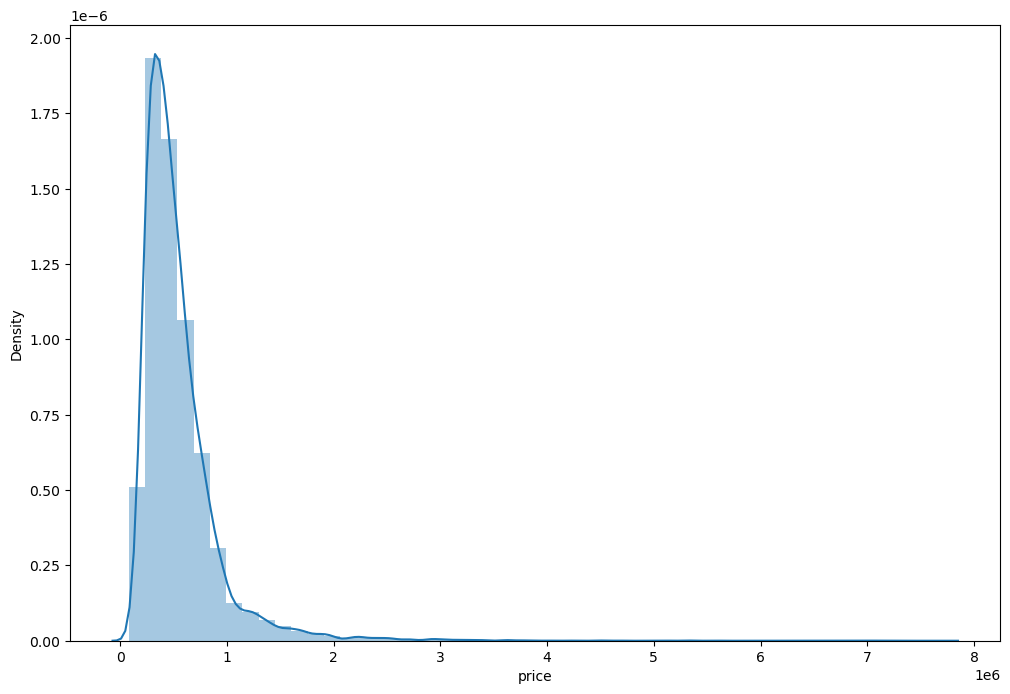

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

C:\Users\gilbe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

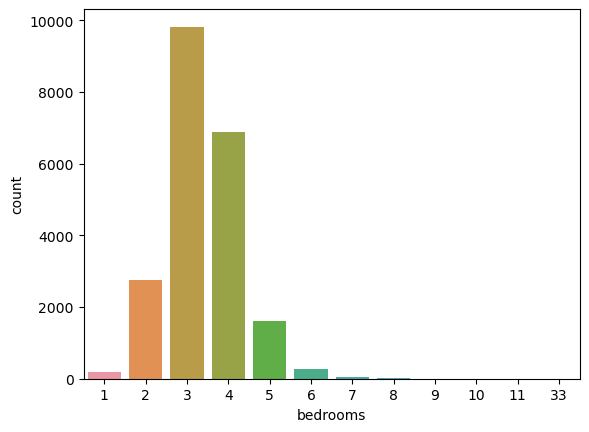

In [6]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

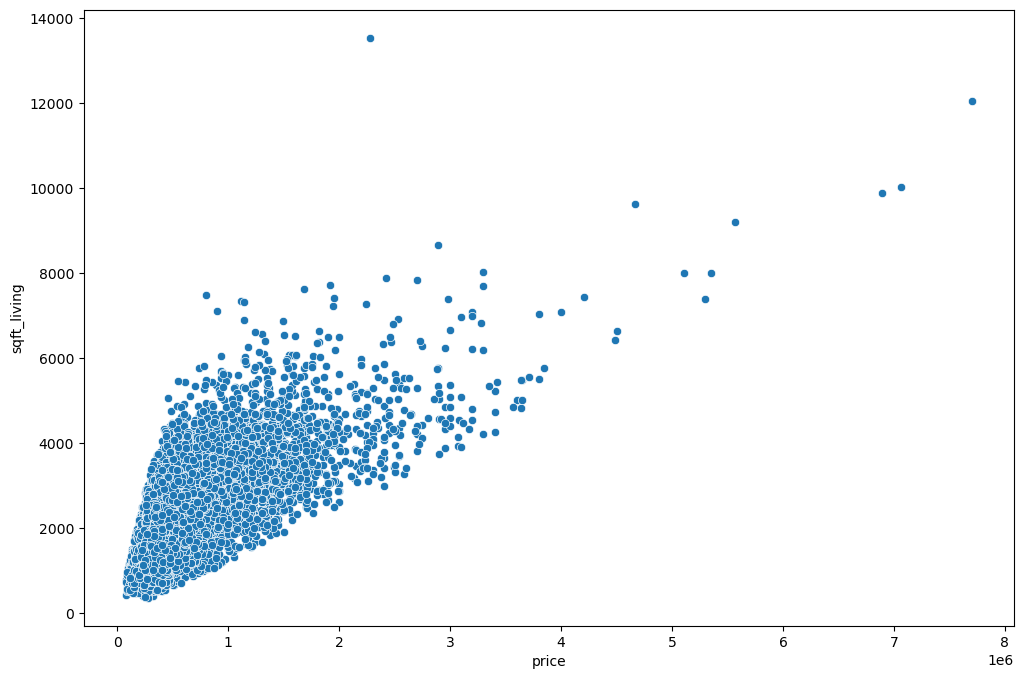

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

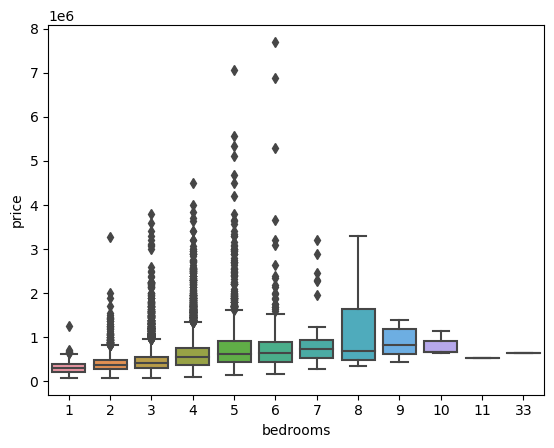

In [8]:
sns.boxplot(x='bedrooms',y='price',data=df)

### Propiedades geograficas

<AxesSubplot:xlabel='price', ylabel='long'>

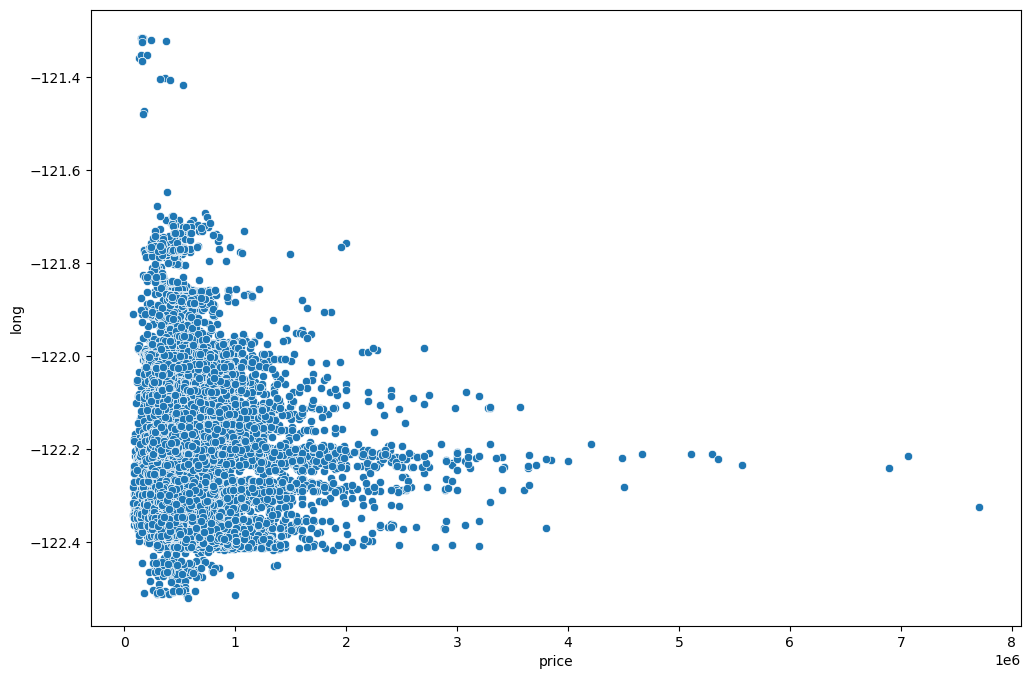

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

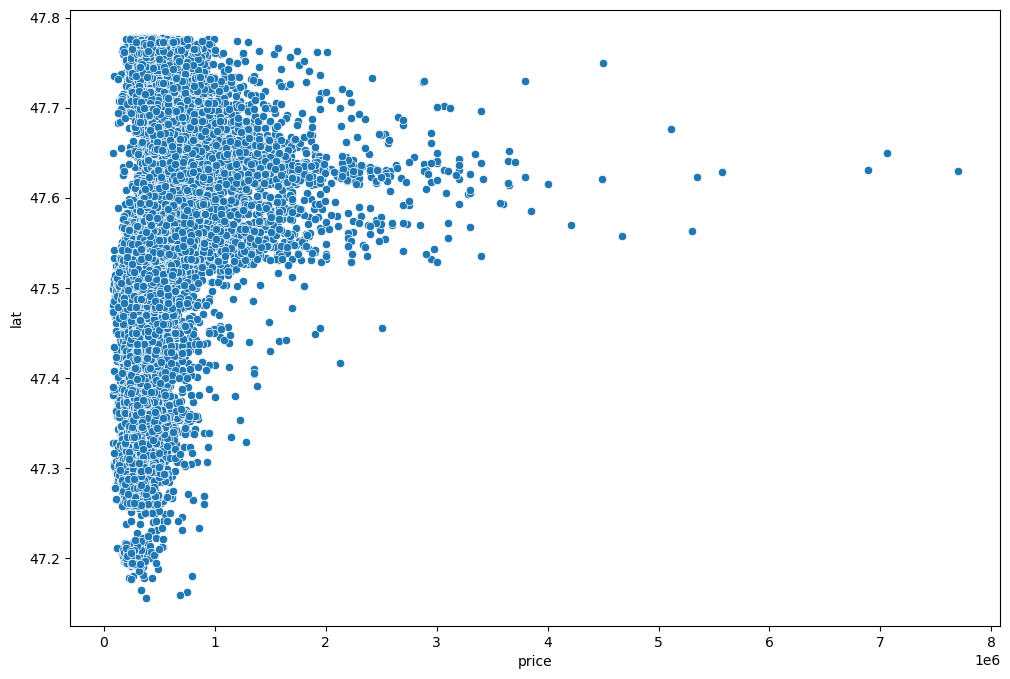

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

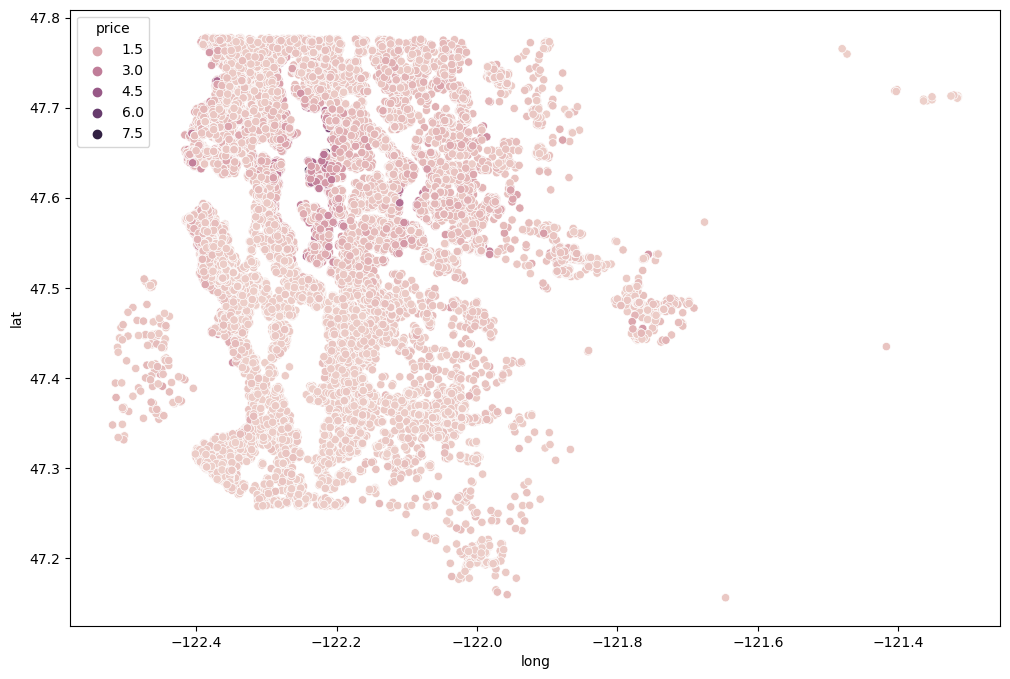

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [12]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [13]:
len(df)*(0.01)

215.97

In [14]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

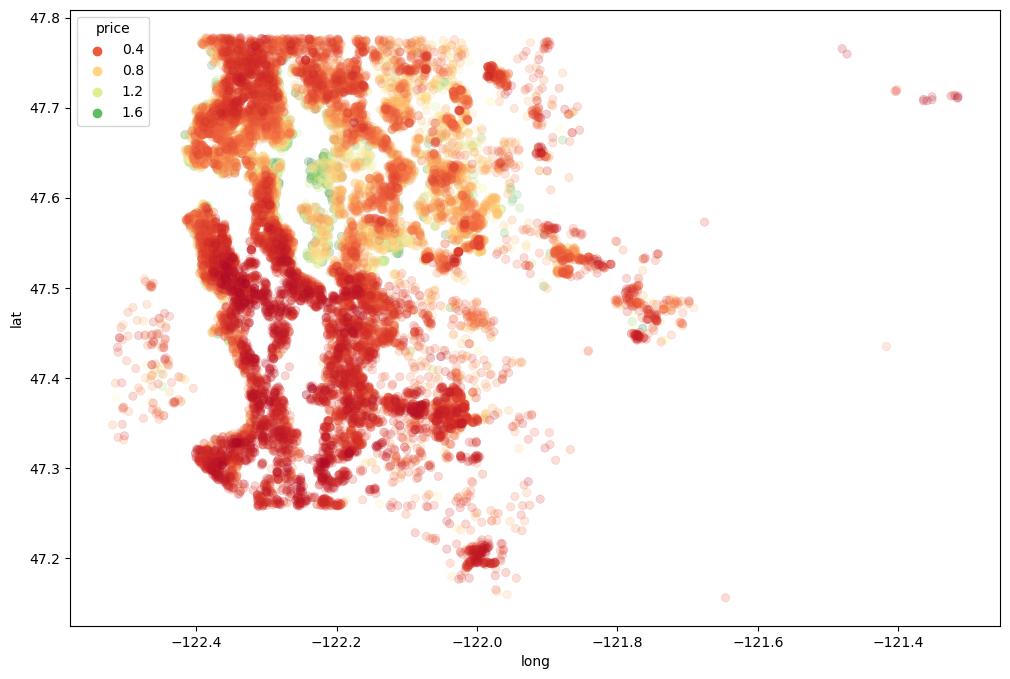

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### Otras caracteristica

<AxesSubplot:xlabel='waterfront', ylabel='price'>

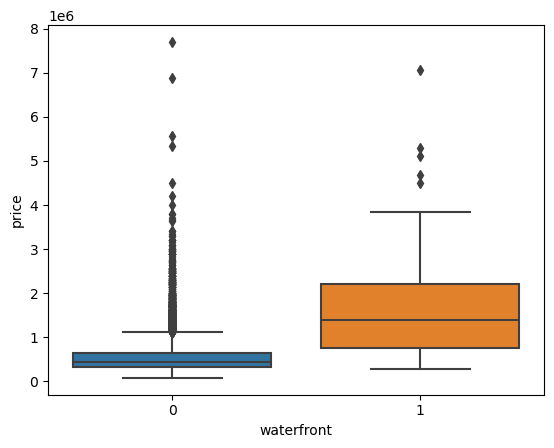

In [16]:
sns.boxplot(x='waterfront',y='price',data=df)

## Trabajando con variables

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
df = df.drop('id',axis=1)

In [20]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Ingenieria de variables para fechas

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['month'] = df['date'].apply(lambda date:date.month)

In [23]:
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

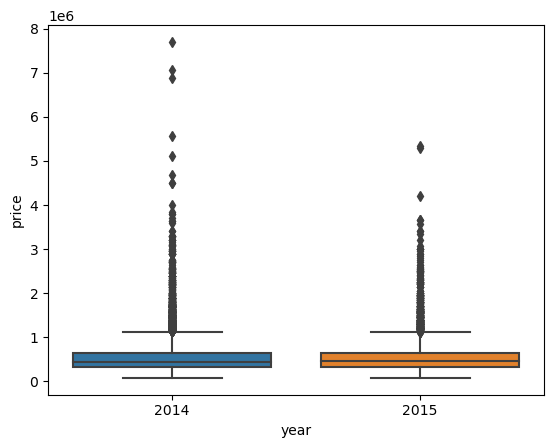

In [24]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

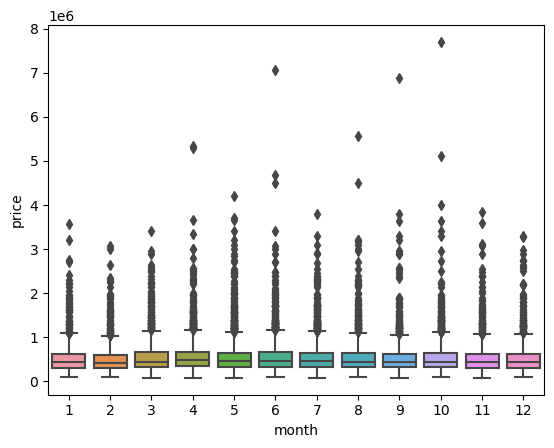

In [25]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

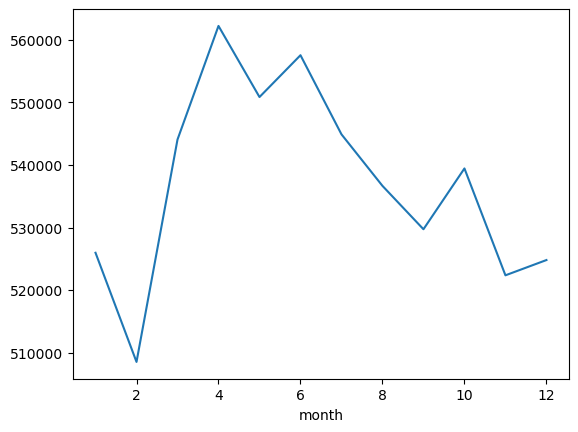

In [26]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

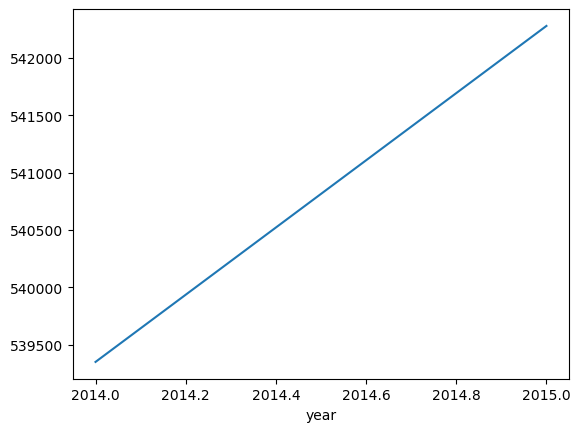

In [27]:
df.groupby('year').mean()['price'].plot()

In [28]:
df = df.drop('date',axis=1)

In [29]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

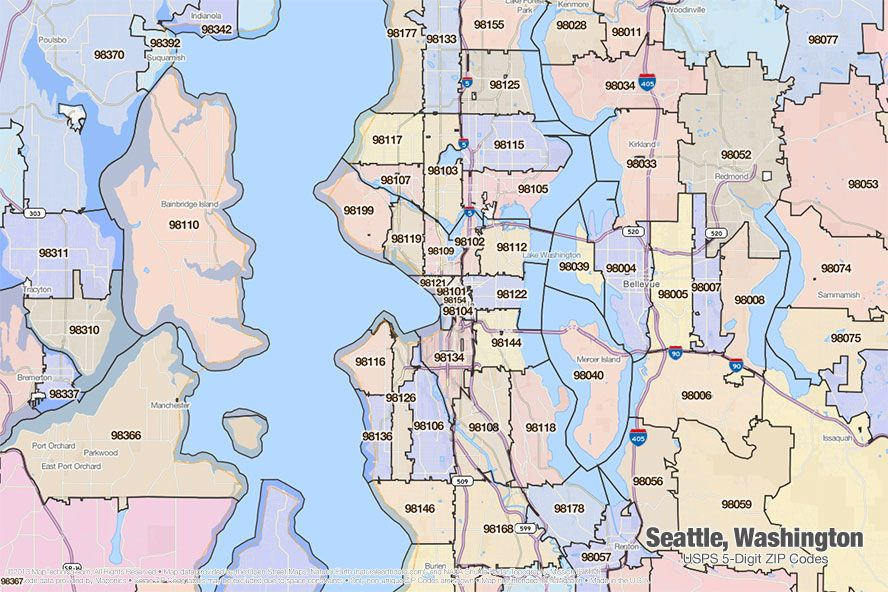

In [30]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# Puede valer la pena considerar eliminar esto
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [31]:
df = df.drop('zipcode',axis=1)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [33]:
# podría tener sentido debido a la escala, más alto debería correlacionarse con más valor
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Escalado y división de prueba y entrenamiento

In [35]:
X = df.drop('price',axis=1)
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Escalando

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train= scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(15117, 19)

In [43]:
X_test.shape

(6480, 19)

## Creando modelo

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Entrenando modelo

In [46]:
model.fit(x=X_train,
          y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 3s 6ms/step - loss: 430217986048.0000 - val_loss: 418786312192.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 427650580480.0000 - val_loss: 410154893312.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 395512348672.0000 - val_loss: 341115043840.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 269455048704.0000 - val_loss: 168917434368.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 122872242176.0000 - val_loss: 95845097472.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 97744936960.0000 - val_loss: 93690740736.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 95704563712.0000 - val_loss: 91758043136.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 93780901888.0000 - val_loss: 89892626432.0000
Epoch 9/400
119/119 [==

119/119 [==============================] - 0s 3ms/step - loss: 36742811648.0000 - val_loss: 35527249920.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 36591689728.0000 - val_loss: 35359928320.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 36434300928.0000 - val_loss: 35205992448.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 36360183808.0000 - val_loss: 35068297216.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 36142624768.0000 - val_loss: 34987319296.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 35988520960.0000 - val_loss: 34779635712.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 35889471488.0000 - val_loss: 34730262528.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 35732529152.0000 - val_loss: 34499461120.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 32380471296.0000 - val_loss: 30849906688.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 32326000640.0000 - val_loss: 30826491904.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 32349761536.0000 - val_loss: 30813511680.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 32333883392.0000 - val_loss: 30822903808.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32257273856.0000 - val_loss: 30877560832.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32307410944.0000 - val_loss: 30795419648.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 32207058944.0000 - val_loss: 30687055872.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 32187279360.0000 - val_loss: 30634786816.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31105966080.0000 - val_loss: 29365299200.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31057561600.0000 - val_loss: 29353160704.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31112097792.0000 - val_loss: 29310257152.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31054458880.0000 - val_loss: 29303623680.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31073619968.0000 - val_loss: 29311768576.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31016192000.0000 - val_loss: 29252859904.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 31010961408.0000 - val_loss: 29231341568.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 31017314304.0000 - val_loss: 29213325312.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30464428032.0000 - val_loss: 28390096896.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30374664192.0000 - val_loss: 28343240704.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30326331392.0000 - val_loss: 28330827776.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30368049152.0000 - val_loss: 28332318720.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30333720576.0000 - val_loss: 28340658176.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30290882560.0000 - val_loss: 28299724800.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30291685376.0000 - val_loss: 28258476032.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 30308444160.0000 - val_loss: 28369676288.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29800087552.0000 - val_loss: 27680718848.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 29765742592.0000 - val_loss: 27568697344.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 29809997824.0000 - val_loss: 27533094912.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 29731096576.0000 - val_loss: 27546515456.0000
Epoch 337/400
119/119 [==============================] - 0s 4ms/step - loss: 29718188032.0000 - val_loss: 27534196736.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 29734864896.0000 - val_loss: 27547873280.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 29754791936.0000 - val_loss: 27533805568.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 29665355776.0000 - val_loss: 27619973120.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29039941632.0000 - val_loss: 26658828288.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29003902976.0000 - val_loss: 26667182080.0000


In [47]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

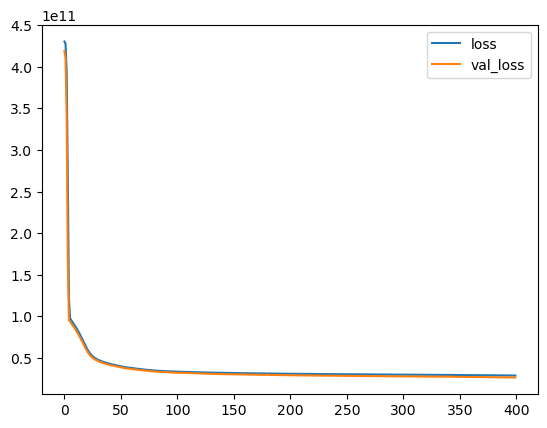

In [48]:
losses.plot()

# Evaluando datos de prueba

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Prediciendo datos nuevos

In [50]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [51]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [52]:
mean_absolute_error(y_test,predictions)

101296.78574158468

In [53]:
np.sqrt(mean_squared_error(y_test,predictions))

163300.8967067107

In [54]:
explained_variance_score(y_test,predictions)

0.7989250242186132

In [55]:
df['price'].mean()

540296.5735055795

In [56]:
df['price'].median()

450000.0

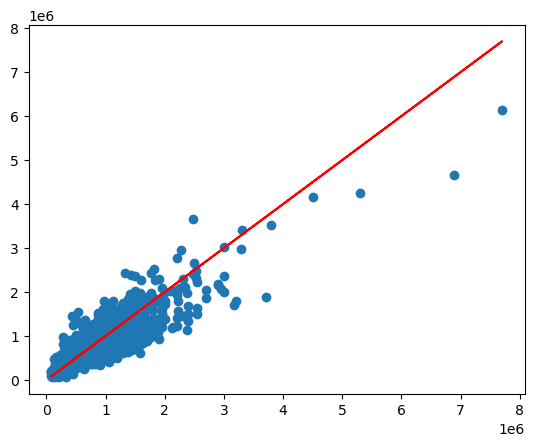

In [57]:
# nuestras predicciones
plt.scatter(y_test,predictions)

# predicciones perfectas linea roja
plt.plot(y_test,y_test,'r')

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

C:\Users\gilbe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

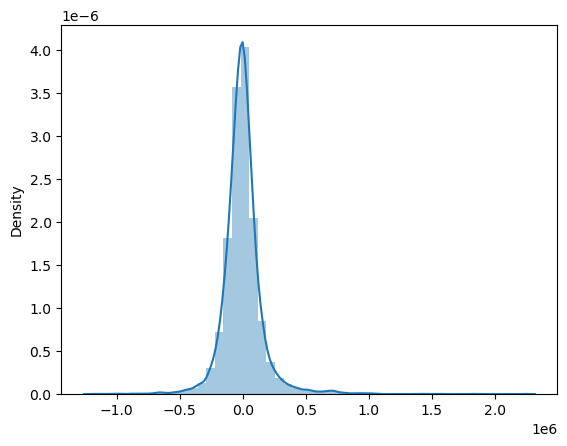

In [59]:
sns.distplot(errors)

-------------
### Prediciendo una casa sola

In [60]:
single_house = df.drop('price',axis=1).iloc[0]

In [61]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [62]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [63]:
model.predict(single_house)

1/1 [==============================] - 0s 27ms/step


array([[286091.97]], dtype=float32)

In [64]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64